# Diagnostics on joint distribution between Tmax and RH

This script diagnose joint distribution between daily maximum temperature and relative humidity through the whole period and in individual month.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
import xarray as xr
import netCDF4 as nc

In [2]:
dirt = '/scratch/jlc449/TS_files'
city = 'CHI'
ensembles = np.arange(35)+1

## Plot joint distribution between Tmax and RH through out the periods

In [3]:
tmax = np.zeros([13140,len(ensembles)])
rh = np.zeros([13140,len(ensembles)])
for i,ens in enumerate(ensembles):
    n = str(ens).zfill(3)
    print(n)
    f = '{dirt}/{city}-ens{ensemble}.txt'.format(dirt=dirt, city=city, ensemble = n)
    ds = np.loadtxt(f, skiprows = 2)
    tmax[:,i]=ds[:,1]-273.15
    rh[:,i] = ds[:,-1]
time = ds[:,0]

001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035


## plot joint distribution

In [8]:
draw_rh = np.reshape(rh, [rh.size])
draw_tmax = np.reshape(tmax, [tmax.size])
# Calculate the point density

In [9]:
z=kde.gaussian_kde([draw_tmax,draw_rh])

In [10]:
nbins = 50
xi, yi = np.mgrid[draw_tmax.min():draw_tmax.max():nbins*1j, draw_rh.min():draw_rh.max():nbins*1j]
zi = z(np.vstack([xi.flatten(), yi.flatten()]))

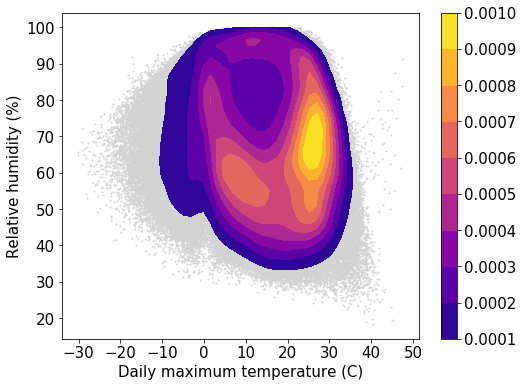

In [11]:
fig=plt.figure(figsize=(8,6))
plt.scatter(draw_tmax, draw_rh, c = 'lightgrey', s=1)
c=plt.contourf(xi, yi, zi.reshape(xi.shape), np.arange(0.0001, 0.00110,0.0001), cmap='plasma')
plt.xlabel('Daily maximum temperature (C)', fontsize=15)
plt.ylabel('Relative humidity (%)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(c)
cbar.ax.tick_params(labelsize=15) 

## Plot joint distributions between Tmax and RH for 3 groups and 12 months

In [4]:
months = range(1,13)
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
years_gp1 = range(1990, 2006)
years_gp2 = range(2026, 2036)
years_gp3 = range(2071, 2081)

In [9]:
tmax1 = tmax[time<20060000.,:]
tmax2 = tmax[(time>20060000.)&(time<20360000.),:]
tmax3 = tmax[(time>20700000.)&(time<20810000.),:]
rh1 = rh[time<20060000.,:]
rh2 = rh[(time>20060000.)&(time<20360000.),:]
rh3 = rh[(time>20700000.)&(time<20810000.),:]
mon1 = time[time<20060000]//100%100
mon2 = time[(time>20060000.)&(time<20360000.)]//100%100
mon3 = time[(time>20700000.)&(time<20810000.)]//100%100

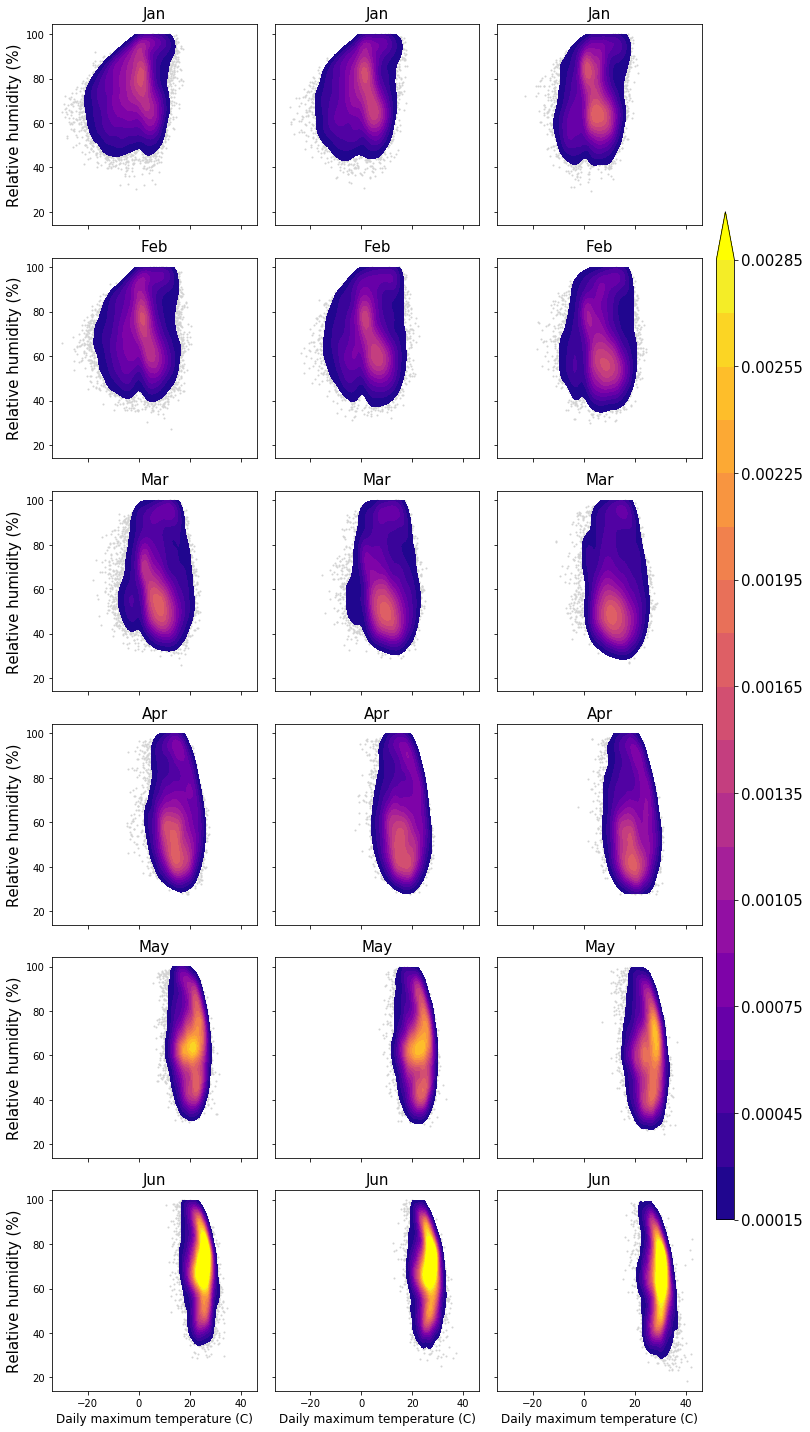

In [20]:
fig, axes = plt.subplots(6,3,figsize=(10, 20),sharex=True, sharey=True, tight_layout=True)
nbins = 50
nmon = 6
for i in range(nmon):
    draw_tmax1 = tmax1[mon1==i+1,:].flatten()
    draw_rh1 = rh1[mon1==i+1,:].flatten()
    z1=kde.gaussian_kde([draw_tmax1,draw_rh1])
    x1, y1 = np.mgrid[draw_tmax1.min():draw_tmax1.max():nbins*1j, draw_rh1.min():draw_rh1.max():nbins*1j]
    zz1 = z1(np.vstack([x1.flatten(), y1.flatten()]))
    axes[i,0].scatter(draw_tmax1, draw_rh1, c = 'lightgrey', s=1)
    c=axes[i,0].contourf(x1, y1, zz1.reshape(x1.shape), np.arange(0.00015, 0.00285,0.00015), cmap='plasma',extend='max')
    c.cmap.set_over('yellow')
    if i==nmon-1:
        axes[i,0].set_xlabel('Daily maximum temperature (C)', fontsize=12)
    axes[i,0].set_ylabel('Relative humidity (%)', fontsize=15)
    axes[i,0].set_title(month_names[i], fontsize=15)   
    
    draw_tmax2 = tmax2[mon2==i+1,:].flatten()
    draw_rh2 = rh2[mon2==i+1,:].flatten()
    z2=kde.gaussian_kde([draw_tmax2,draw_rh2])
    x2, y2 = np.mgrid[draw_tmax2.min():draw_tmax2.max():nbins*1j, draw_rh2.min():draw_rh2.max():nbins*1j]
    zz2 = z2(np.vstack([x2.flatten(), y2.flatten()]))
    axes[i,1].scatter(draw_tmax2, draw_rh2, c = 'lightgrey', s=1)
    c=axes[i,1].contourf(x2, y2, zz2.reshape(x2.shape), np.arange(0.00015, 0.00285,0.00015), cmap='plasma',extend='max')
    c.cmap.set_over('yellow')
    if i==nmon-1:
        axes[i,1].set_xlabel('Daily maximum temperature (C)', fontsize=12)
    axes[i,1].set_title(month_names[i], fontsize=15)

    draw_tmax3 = tmax3[mon3==i+1,:].flatten()
    draw_rh3 = rh3[mon3==i+1,:].flatten()
    z3=kde.gaussian_kde([draw_tmax3,draw_rh3])
    x3, y3 = np.mgrid[draw_tmax3.min():draw_tmax3.max():nbins*1j, draw_rh3.min():draw_rh3.max():nbins*1j]
    zz3 = z3(np.vstack([x3.flatten(), y3.flatten()]))
    axes[i,2].scatter(draw_tmax3, draw_rh3, c = 'lightgrey', s=1)
    c=axes[i,2].contourf(x3, y3, zz3.reshape(x3.shape), np.arange(0.00015, 0.00285,0.00015), cmap='plasma',extend='max')
    c.cmap.set_over('yellow')
    if i==nmon-1:
        axes[i,2].set_xlabel('Daily maximum temperature (C)', fontsize=12)
    axes[i,2].set_title(month_names[i], fontsize=15)

fig.subplots_adjust(right=1)
cbar_ax = fig.add_axes([1, 0.15, 0.025, 0.7])
cbar=fig.colorbar(c, cax=cbar_ax)
cbar.ax.tick_params(labelsize=15)

In [14]:
zz3.max()

0.0044507058251433375